In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/CS 406-Neural Network Research-Toxicity

/content/drive/MyDrive/CS 406-Neural Network Research-Toxicity


# Classification and Analysis of Comment toxicity

Installing dependencies


In [ ]:
!pip install tensorflow tensorflow pandas matplotlib scikit-learn

In [4]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

Dataset loading

In [5]:
df = pd.read_csv('/content/drive/MyDrive/CS 406-Neural Network Research-Toxicity/train.csv')

In [ ]:
print(df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


# Assignment


Check for missing values and impute or remove them as necessary.

In [6]:

missing_values = df.isnull().sum()


missing_values = missing_values[missing_values > 0]


if not missing_values.empty:
    print("Missing values detected:\n", missing_values)
else:
    print("No missing values present.")


No missing values present.


Identify and handle outliers.

In [7]:

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers


outliers = df.select_dtypes(include=['float64', 'int64']).apply(find_outliers)


print("Outliers detected:")
for column in outliers.columns:
    if not outliers[column].dropna().empty:
        print(f"Outliers in {column}:")
        print(outliers[column].dropna())
        print("\n")


Outliers detected:
Outliers in toxic:
6         1.0
12        1.0
16        1.0
42        1.0
43        1.0
         ... 
159494    1.0
159514    1.0
159541    1.0
159546    1.0
159554    1.0
Name: toxic, Length: 15294, dtype: float64


Outliers in severe_toxic:
6         1.0
55        1.0
181       1.0
442       1.0
579       1.0
         ... 
159096    1.0
159099    1.0
159281    1.0
159312    1.0
159400    1.0
Name: severe_toxic, Length: 1595, dtype: float64


Outliers in obscene:
6         1.0
42        1.0
43        1.0
51        1.0
55        1.0
         ... 
159411    1.0
159493    1.0
159494    1.0
159541    1.0
159554    1.0
Name: obscene, Length: 8449, dtype: float64


Outliers in threat:
79        1.0
176       1.0
600       1.0
802       1.0
1017      1.0
         ... 
157718    1.0
158717    1.0
158856    1.0
159029    1.0
159400    1.0
Name: threat, Length: 478, dtype: float64


Outliers in insult:
6         1.0
42        1.0
43        1.0
55        1.0
56        1.0
   

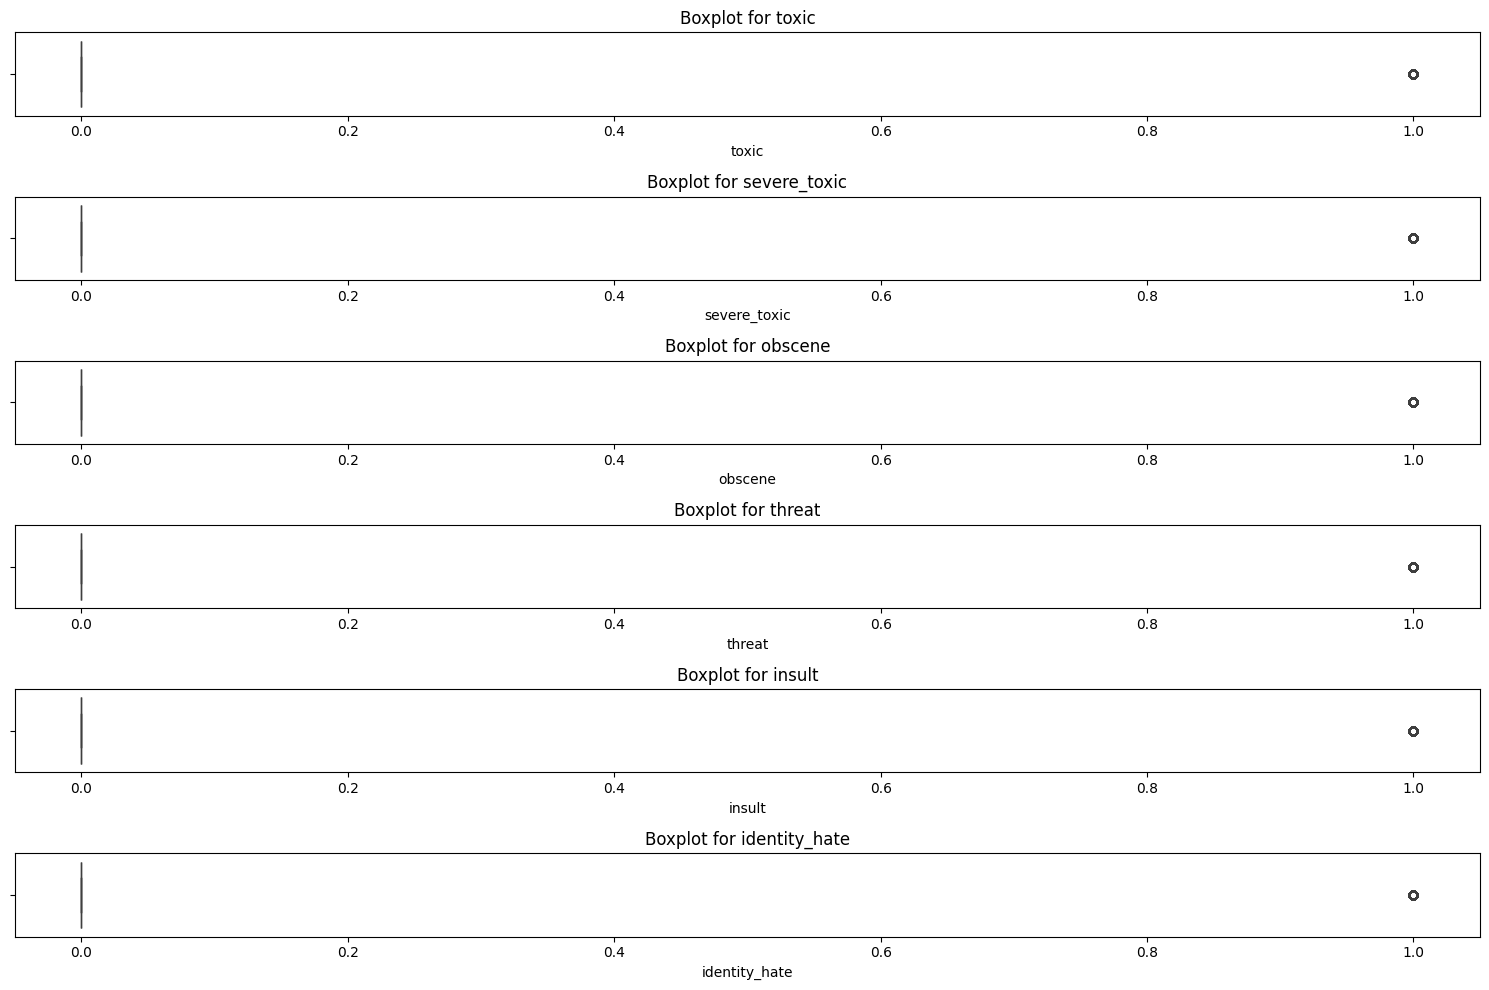

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')


plt.tight_layout()


plt.show()


In [9]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numerical_columns:
    df = remove_outliers(df, column)


Examine the distribution of each column.

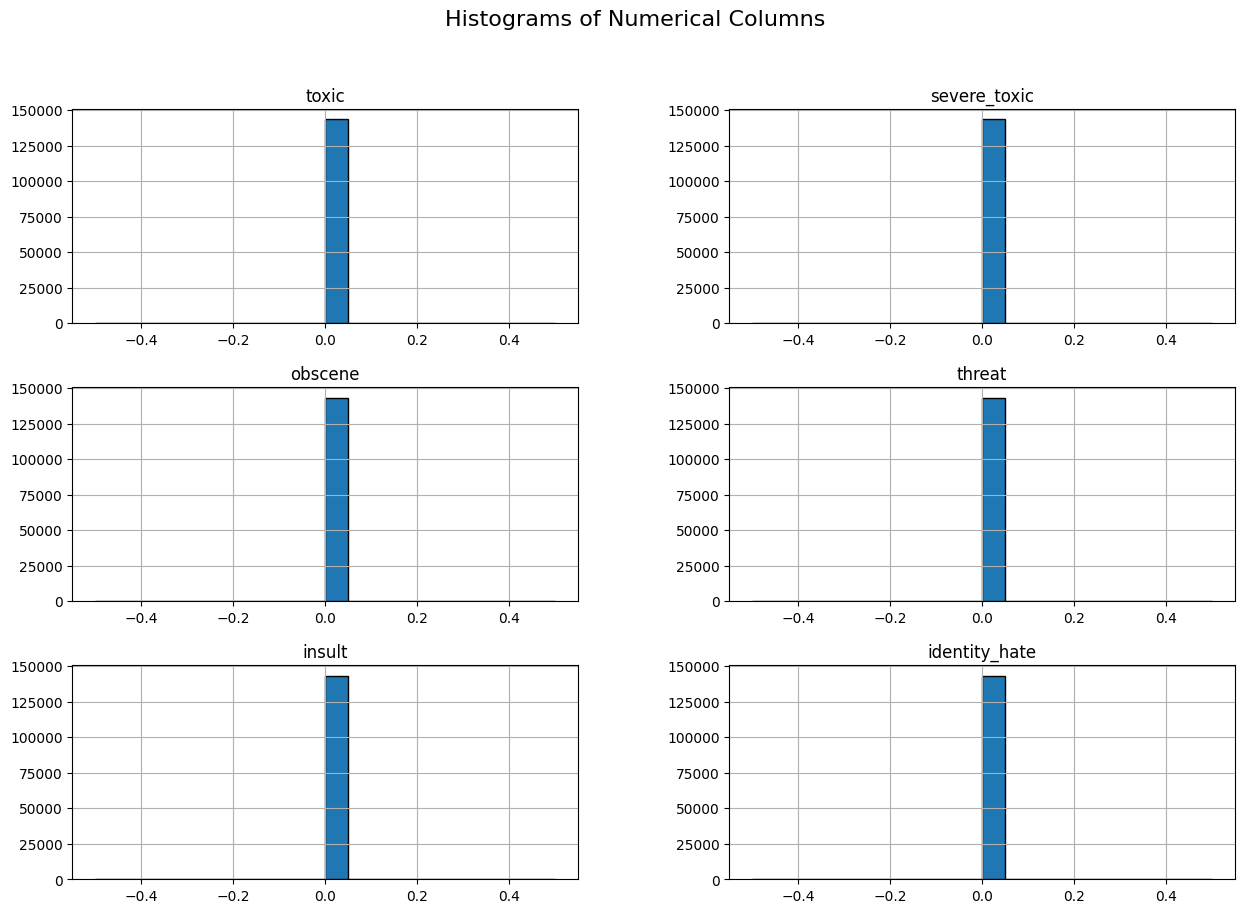

In [10]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()


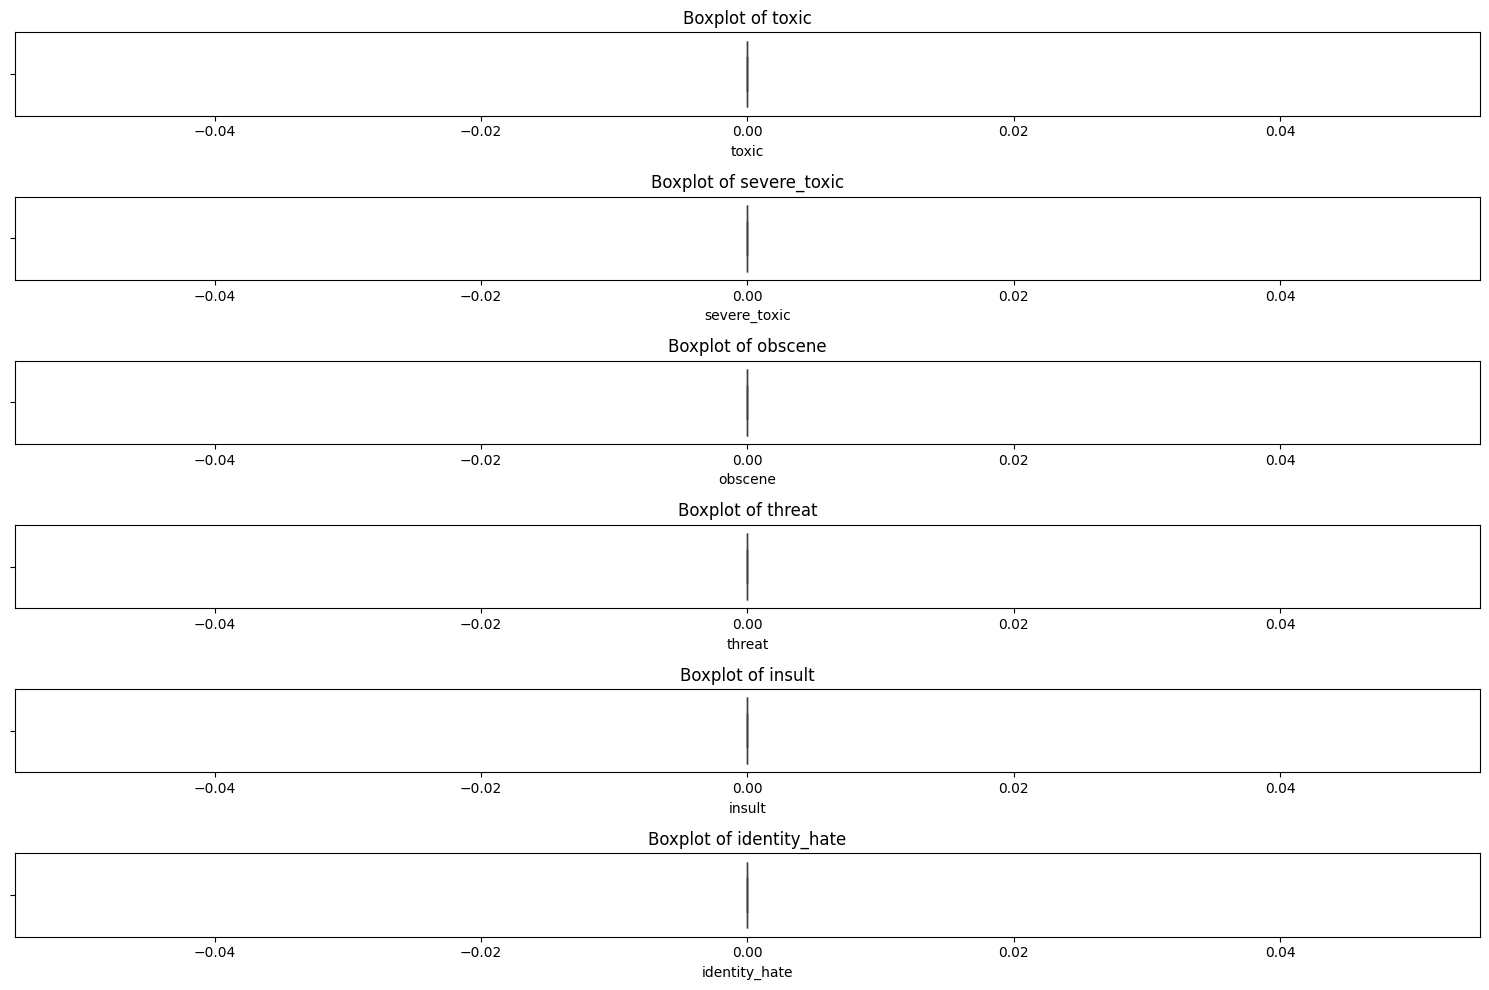

In [11]:
import seaborn as sns


plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [ ]:
print(df.describe())

          toxic  severe_toxic   obscene    threat    insult  identity_hate
count  143346.0      143346.0  143346.0  143346.0  143346.0       143346.0
mean        0.0           0.0       0.0       0.0       0.0            0.0
std         0.0           0.0       0.0       0.0       0.0            0.0
min         0.0           0.0       0.0       0.0       0.0            0.0
25%         0.0           0.0       0.0       0.0       0.0            0.0
50%         0.0           0.0       0.0       0.0       0.0            0.0
75%         0.0           0.0       0.0       0.0       0.0            0.0
max         0.0           0.0       0.0       0.0       0.0            0.0


Normalize or standardize the data.

Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])


print(df_normalized.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...    0.0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...    0.0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...    0.0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...    0.0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...    0.0   

   severe_toxic  obscene  threat  insult  identity_hate  
0           0.0      0.0     0.0     0.0            0.0  
1           0.0      0.0     0.0     0.0            0.0  
2           0.0      0.0     0.0     0.0            0.0  
3           0.0      0.0     0.0     0.0            0.0  
4           0.0      0.0     0.0     0.0            0.0  


Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()


df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])


print(df_standardized.head())


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...    0.0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...    0.0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...    0.0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...    0.0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...    0.0   

   severe_toxic  obscene  threat  insult  identity_hate  
0           0.0      0.0     0.0     0.0            0.0  
1           0.0      0.0     0.0     0.0            0.0  
2           0.0      0.0     0.0     0.0            0.0  
3           0.0      0.0     0.0     0.0            0.0  
4           0.0      0.0     0.0     0.0            0.0  


Calculate descriptive statistics for each column.

In [14]:

descriptive_stats_all = df.describe(include='all')

print(descriptive_stats_all)

                      id                                       comment_text  \
count             143346                                             143346   
unique            143346                                             143346   
top     0000997932d777bf  Explanation\nWhy the edits made under my usern...   
freq                   1                                                  1   
mean                 NaN                                                NaN   
std                  NaN                                                NaN   
min                  NaN                                                NaN   
25%                  NaN                                                NaN   
50%                  NaN                                                NaN   
75%                  NaN                                                NaN   
max                  NaN                                                NaN   

           toxic  severe_toxic   obscene    threat 

Detect and remove duplicate entries.

In [15]:

duplicates = df[df.duplicated()]


print(f"Number of duplicate entries: {duplicates.shape[0]}")
if not duplicates.empty:
    print("Duplicate entries detected:\n", duplicates)
else:
    print("No duplicate entries found.")


Number of duplicate entries: 0
No duplicate entries found.


Scale features to a consistent range (e.g., Min-Max scaling).

In [16]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])


print(df_scaled.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...    0.0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...    0.0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...    0.0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...    0.0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...    0.0   

   severe_toxic  obscene  threat  insult  identity_hate  
0           0.0      0.0     0.0     0.0            0.0  
1           0.0      0.0     0.0     0.0            0.0  
2           0.0      0.0     0.0     0.0            0.0  
3           0.0      0.0     0.0     0.0            0.0  
4           0.0      0.0     0.0     0.0            0.0  


Transform skewed data (e.g., using log transformation).

In [17]:
import numpy as np
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


skewed_columns = df[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)


print("Skewed columns before transformation:\n", skewed_columns)

df_transformed = df.copy()
for column in skewed_columns.index:
    if skewed_columns[column] > 0.5:
        df_transformed[column] = np.log1p(df_transformed[column])


skewed_columns_after = df_transformed[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewed columns after transformation:\n", skewed_columns_after)


for column in skewed_columns.index:
    if skewed_columns[column] > 0.5:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.hist(df[column], bins=30, edgecolor='black')
        plt.title(f'Before Log Transformation: {column}')

        plt.subplot(1, 2, 2)
        plt.hist(df_transformed[column], bins=30, edgecolor='black')
        plt.title(f'After Log Transformation: {column}')
        plt.show()


Skewed columns before transformation:
 toxic            0.0
severe_toxic     0.0
obscene          0.0
threat           0.0
insult           0.0
identity_hate    0.0
dtype: float64
Skewed columns after transformation:
 toxic            0.0
severe_toxic     0.0
obscene          0.0
threat           0.0
insult           0.0
identity_hate    0.0
dtype: float64


Split data into training, validation, and test sets.

In [20]:
from sklearn.model_selection import train_test_split

X = df['comment_text']
y = df.drop(columns=['id', 'comment_text'])

# 70% for training and 15% teting and 15% validataion
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (100342,)
Validation set shape: (21502,)
Test set shape: (21502,)
